In [ ]:
#Program-4
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F # Import functional for ReLU

# --- 1. Data Loading and Transformation ---
# Load MNIST Dataset
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# --- 2. Neural Network Definition ---
class SimpleNN(nn.Module):
    def __init__(self, use_bn=False, use_dropout=False):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        # Batch Normalization layer, or Identity if not used
        self.batch_norm1 = nn.BatchNorm1d(256) if use_bn else nn.Identity()
        # Dropout layer, or Identity if not used
        self.dropout1 = nn.Dropout(0.5) if use_dropout else nn.Identity()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        # Flatten the input image (28x28) into a 1D vector (784)
        x = x.view(-1, 28 * 28)

        # First fully connected layer
        x = self.fc1(x)
        # Apply Batch Normalization (if enabled)
        x = self.batch_norm1(x)
        # Apply ReLU activation
        x = F.relu(x) # Using functional ReLU for consistency
        # Apply Dropout (if enabled)
        x = self.dropout1(x)

        # Second fully connected layer (output layer)
        x = self.fc2(x)
        return x

# --- 3. Training and Evaluation Function ---
def train_and_evaluate(model, optimizer, criterion, train_loader, test_loader, epochs=5):
    for epoch in range(epochs):
        model.train() # Set model to training mode
        for images, labels in train_loader:
            optimizer.zero_grad() # Clear gradients
            outputs = model(images) # Forward pass
            loss = criterion(outputs, labels) # Calculate loss
            loss.backward() # Backward pass
            optimizer.step() # Update weights

        # Evaluate the model after each epoch
        model.eval() # Set model to evaluation mode
        correct_predictions = 0
        total_samples = 0
        with torch.no_grad(): # Disable gradient calculation for evaluation
            for images, labels in test_loader:
                outputs = model(images)
                # Get the index of the max log-probability (predicted class)
                _, predicted = torch.max(outputs.data, 1) # Corrected: use predicted[1]
                total_samples += labels.size(0)
                correct_predictions += (predicted == labels).sum().item()

    accuracy = 100 * correct_predictions / total_samples
    return accuracy

# --- 4. Model Initialization and Training ---
# Initialize different models
model_basic = SimpleNN()
model_bn = SimpleNN(use_bn=True)
model_dropout = SimpleNN(use_dropout=True)

# Define Loss function and Optimizers
criterion = nn.CrossEntropyLoss() # Suitable for multi-class classification

optimizer_basic = optim.Adam(model_basic.parameters(), lr=0.001)
optimizer_bn = optim.Adam(model_bn.parameters(), lr=0.001)
optimizer_dropout = optim.Adam(model_dropout.parameters(), lr=0.001)

# Train and Evaluate Models
print("Training and evaluating Basic Model...")
acc_basic = train_and_evaluate(model_basic, optimizer_basic, criterion, train_loader, test_loader)
print(f"Accuracy without BN & Dropout: {acc_basic:.2f}%")

print("\nTraining and evaluating Model with Batch Normalization...")
acc_bn = train_and_evaluate(model_bn, optimizer_bn, criterion, train_loader, test_loader)
print(f"Accuracy with Batch Normalization: {acc_bn:.2f}%")

print("\nTraining and evaluating Model with Dropout...")
acc_dropout = train_and_evaluate(model_dropout, optimizer_dropout, criterion, train_loader, test_loader)
print(f"Accuracy with Dropout: {acc_dropout:.2f}%")

100%|██████████| 9.91M/9.91M [00:00<00:00, 129MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 27.8MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 34.9MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.84MB/s]


Training and evaluating Basic Model...
Accuracy without BN & Dropout: 97.62%

Training and evaluating Model with Batch Normalization...
Accuracy with Batch Normalization: 97.86%

Training and evaluating Model with Dropout...
Accuracy with Dropout: 97.67%


100%|██████████| 170M/170M [00:01<00:00, 101MB/s]


Training with SGD Optimizer:
Epoch [1/5], Train Loss: 1.5507, Test Loss: 1.1983, Accuracy: 57.22%
Epoch [2/5], Train Loss: 1.0861, Test Loss: 1.0255, Accuracy: 64.06%
Epoch [3/5], Train Loss: 0.8910, Test Loss: 0.9007, Accuracy: 68.31%
Epoch [4/5], Train Loss: 0.7538, Test Loss: 0.8598, Accuracy: 70.35%
Epoch [5/5], Train Loss: 0.6416, Test Loss: 0.8255, Accuracy: 72.14%

Training with Adam Optimizer:
Epoch [1/5], Train Loss: 1.3595, Test Loss: 1.0954, Accuracy: 61.34%
Epoch [2/5], Train Loss: 0.9906, Test Loss: 0.9305, Accuracy: 67.54%
Epoch [3/5], Train Loss: 0.8428, Test Loss: 0.8859, Accuracy: 69.16%
Epoch [4/5], Train Loss: 0.7338, Test Loss: 0.8702, Accuracy: 70.27%
Epoch [5/5], Train Loss: 0.6478, Test Loss: 0.8586, Accuracy: 70.57%


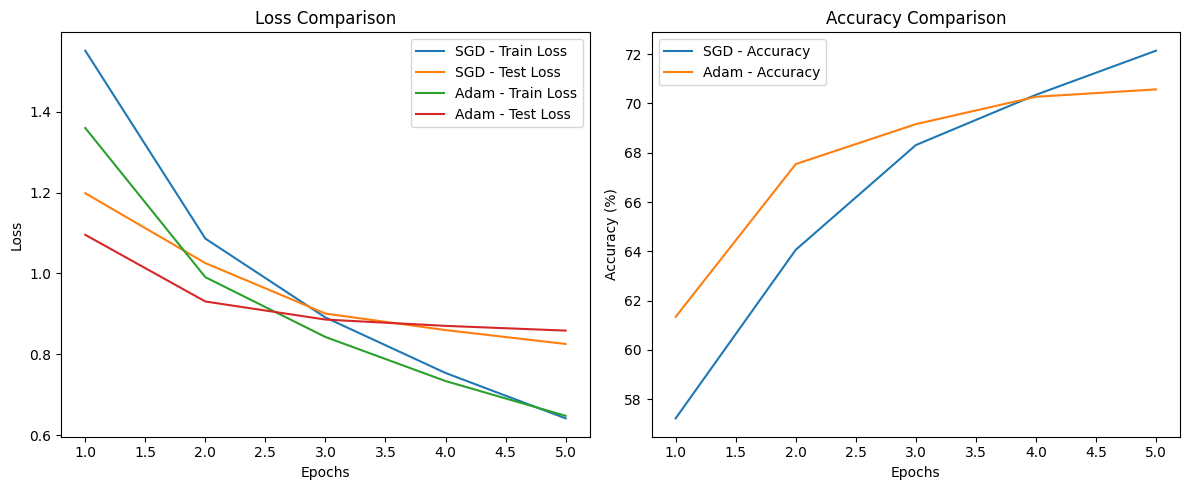

In [ ]:
#Program-5
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F # Import functional for ReLU

# --- 1. Data Loading and Transformation ---
# Load CIFAR-10 Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    # Normalize with mean and std for 3 channels (CIFAR-10)
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# --- 2. Simple CNN Definition ---
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # First convolutional layer: 3 input channels (RGB), 32 output channels, 3x3 kernel
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        # Second convolutional layer: 32 input channels, 64 output channels, 3x3 kernel
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Max pooling layer: 2x2 window, stride 2
        self.pool = nn.MaxPool2d(2, 2)
        # Fully connected layers
        # Input to fc1: 64 channels * 8x8 feature map size (after two pooling layers)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10) # 10 output classes for CIFAR-10

    def forward(self, x):
        # Conv1 -> ReLU -> Pool
        x = self.pool(F.relu(self.conv1(x)))
        # Conv2 -> ReLU -> Pool
        x = self.pool(F.relu(self.conv2(x)))

        # Flatten the feature map for the fully connected layers
        x = x.view(-1, 64 * 8 * 8)

        # FC1 -> ReLU
        x = F.relu(self.fc1(x))
        # FC2 (output layer)
        x = self.fc2(x)
        return x

# --- 3. Training and Evaluation Function ---
def train_and_evaluate(model, optimizer, criterion, train_loader, test_loader, epochs=5):
    train_losses, test_losses, test_accuracies = [], [], []

    for epoch in range(epochs):
        model.train() # Set model to training mode
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad() # Clear gradients
            outputs = model(images) # Forward pass
            loss = criterion(outputs, labels) # Calculate loss
            loss.backward() # Backward pass
            optimizer.step() # Update weights
            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Evaluate Model
        model.eval() # Set model to evaluation mode
        test_loss = 0.0
        correct_predictions = 0
        total_samples = 0
        with torch.no_grad(): # Disable gradient calculation for evaluation
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total_samples += labels.size(0)
                correct_predictions += (predicted == labels).sum().item()

        avg_test_loss = test_loss / len(test_loader)
        test_losses.append(avg_test_loss)
        accuracy = 100 * correct_predictions / total_samples
        test_accuracies.append(accuracy)

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Accuracy: {accuracy:.2f}%")

    return train_losses, test_losses, test_accuracies

# --- 4. Model Initialization and Training ---
# Initialize two CNN models for comparison
model_sgd = SimpleCNN()
model_adam = SimpleCNN()

# Define Loss Function
criterion = nn.CrossEntropyLoss()

# Define Optimizers
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01, momentum=0.9)
optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.001)

# Train & Evaluate Models
print("Training with SGD Optimizer:")
train_sgd, test_sgd, acc_sgd = train_and_evaluate(model_sgd, optimizer_sgd, criterion, train_loader, test_loader)

print("\nTraining with Adam Optimizer:")
train_adam, test_adam, acc_adam = train_and_evaluate(model_adam, optimizer_adam, criterion, train_loader, test_loader)

# --- 5. Plot Performance Comparison ---
epochs_range = range(1, 6) # Assuming 5 epochs as default

plt.figure(figsize=(12, 5))

# Plot Loss Comparison
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_sgd, label='SGD - Train Loss')
plt.plot(epochs_range, test_sgd, label='SGD - Test Loss')
plt.plot(epochs_range, train_adam, label='Adam - Train Loss')
plt.plot(epochs_range, test_adam, label='Adam - Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Comparison')

# Plot Accuracy Comparison
plt.subplot(1, 2, 2)
plt.plot(epochs_range, acc_sgd, label='SGD - Accuracy')
plt.plot(epochs_range, acc_adam, label='Adam - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Accuracy Comparison')

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()


Using device: cpu

Training U-Net model on cpu for 5 epochs...
Epoch [1/5], Train Loss: 0.0896
Epoch [2/5], Train Loss: 0.0678
Epoch [3/5], Train Loss: 0.0667
Epoch [4/5], Train Loss: 0.0660
Epoch [5/5], Train Loss: 0.0656
Training finished.

Generating predictions and visualizing results...


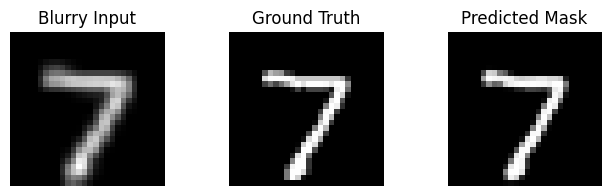

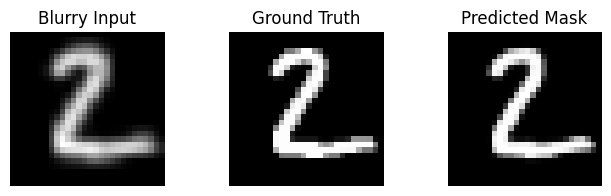

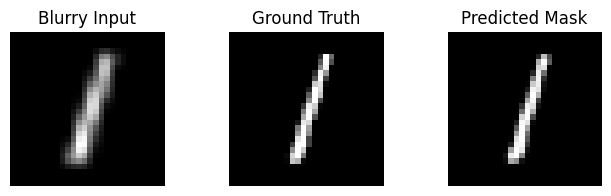

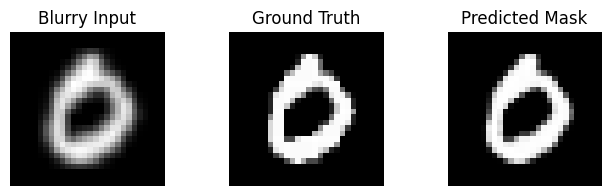

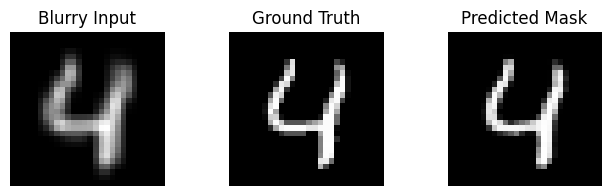

In [ ]:
#Program-6
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np # For converting tensors to numpy for plotting
import torch.nn.functional as F # For activation functions and pooling

# --- 1. Device Configuration ---
# Use GPU if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- 2. Data Loading and Preprocessing ---
# MNIST dataset (images are 28x28 grayscale)
# Transformations: Convert to tensor and normalize to [0, 1]
transform = transforms.Compose([
    transforms.ToTensor(), # Converts PIL Image to Tensor (H, W, C) to (C, H, W) and scales to [0, 1]
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Function to create blurry inputs (simulating "bad images")
def create_blurry_images(images_tensor):
    # Resize down to 14x14, then resize up to 28x28
    # Using F.interpolate for resizing
    blurry_images = F.interpolate(images_tensor, size=(14, 14), mode='bilinear', align_corners=False)
    blurry_images = F.interpolate(blurry_images, size=(28, 28), mode='bilinear', align_corners=False)
    return blurry_images

# --- 3. Simple U-Net Architecture in PyTorch ---
class SimpleUNet(nn.Module):
    def __init__(self):
        super(SimpleUNet, self).__init__()

        # Encoder Path
        # Convolutional layer 1: Input 1 channel (grayscale), Output 32 channels
        self.encoder_conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        # Max Pooling layer 1
        self.encoder_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Convolutional layer 2: Input 32 channels, Output 64 channels
        self.encoder_conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        # Decoder Path
        # Transposed Convolutional layer 1 (Upsampling): Input 64 channels, Output 32 channels
        # Stride 2 doubles the spatial dimensions
        self.decoder_upconv1 = nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1)

        # Output layer: Input 32 channels, Output 1 channel (segmentation mask)
        self.output_conv = nn.Conv2d(32, 1, kernel_size=1)

    def forward(self, x):
        # Encoder
        x = F.relu(self.encoder_conv1(x)) # Conv1 -> ReLU
        x = self.encoder_pool1(x)         # Pool1

        x = F.relu(self.encoder_conv2(x)) # Conv2 -> ReLU

        # Decoder
        x = F.relu(self.decoder_upconv1(x)) # Upconv1 -> ReLU

        # Output layer with Sigmoid activation for binary segmentation
        x = torch.sigmoid(self.output_conv(x))
        return x

# --- 4. Model Initialization, Loss, and Optimizer ---
model = SimpleUNet().to(device) # Initialize model and move to device

# Loss function: Binary Cross-Entropy Loss
# BCEWithLogitsLoss is numerically more stable as it combines sigmoid and BCE
criterion = nn.BCELoss() # Using BCELoss because the model output has sigmoid already

optimizer = optim.Adam(model.parameters(), lr=0.001) # Adam optimizer

# --- 5. Training Loop ---
num_epochs = 5
print(f"\nTraining U-Net model on {device} for {num_epochs} epochs...")
for epoch in range(num_epochs):
    model.train() # Set model to training mode
    running_loss = 0.0
    for batch_idx, (images, _) in enumerate(train_loader):
        # Create blurry versions of the original images
        blurry_images = create_blurry_images(images).to(device)
        # Original images are the ground truth targets
        original_images = images.to(device)

        optimizer.zero_grad() # Clear gradients

        outputs = model(blurry_images) # Forward pass
        loss = criterion(outputs, original_images) # Calculate loss

        loss.backward() # Backward pass
        optimizer.step() # Update weights

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}")
print("Training finished.")

# --- 6. Prediction and Visualization ---
model.eval() # Set model to evaluation mode
print("\nGenerating predictions and visualizing results...")

# Get a batch of test images and their blurry versions
test_images_batch, _ = next(iter(test_loader))
blurry_test_images_batch = create_blurry_images(test_images_batch).to(device)

# Predict masks for the first 5 images in the batch
with torch.no_grad():
    predicted_masks_batch = model(blurry_test_images_batch[:5])

# Visualize the results for the first 5 samples
for i in range(5):
    plt.figure(figsize=(8, 2))

    # Blurry Input
    plt.subplot(1, 3, 1)
    plt.title("Blurry Input")
    # Convert PyTorch tensor to NumPy array and remove channel dimension for plotting
    plt.imshow(blurry_test_images_batch[i].cpu().squeeze().numpy(), cmap='gray')
    plt.axis('off') # Hide axes

    # Ground Truth (Original Image)
    plt.subplot(1, 3, 2)
    plt.title("Ground Truth")
    plt.imshow(test_images_batch[i].cpu().squeeze().numpy(), cmap='gray')
    plt.axis('off')

    # Predicted Mask
    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    # Convert predicted mask to NumPy array
    plt.imshow(predicted_masks_batch[i].cpu().squeeze().numpy(), cmap='gray')
    plt.axis('off')

    plt.show()


In [1]:
#Program-9
import torch
import torch.nn as nn
import torch.optim as optim

# --- 1. Simple RNN Model Definition ---
class SimpleRNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNNModel, self).__init__()
        # Define the RNN layer:
        # input_size: number of features in the input at each time step
        # hidden_size: number of features in the hidden state
        # batch_first=True: input and output tensors are provided as (batch, seq, feature)
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        # Define the fully connected layer that maps the RNN's output to the final prediction
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Pass the input through the RNN layer
        # out: output features from the last layer of the RNN for each time step
        # _: hidden state for each element in the batch (we only need 'out' here)
        out, _ = self.rnn(x) # RNN output: (batch, seq_len, hidden_size)
        # Take the output of the last time step for prediction
        out = out[:, -1, :] # Shape: (batch, hidden_size)
        # Pass the last time step's output through the fully connected layer
        out = self.fc(out) # Shape: (batch, output_size)
        return out

# --- 2. Hyperparameters and Data Generation ---
input_size = 8    # Number of features per time step
hidden_size = 32  # Number of RNN hidden units
output_size = 1   # For binary classification (e.g., 0 or 1)
seq_len = 10      # Length of each input sequence
batch_size = 16   # Number of sequences in a batch

# Generate random input data: (batch_size, seq_len, input_size)
X_data = torch.randn(batch_size, seq_len, input_size)
# Generate random binary target data: (batch_size, 1)
y_targets = torch.randint(0, 2, (batch_size, 1)).float() # .float() for BCEWithLogitsLoss

print("Generated Input Data (X_data sample):")
print(X_data[0]) # Print first sample
print("\nGenerated Target Data (y_targets sample):")
print(y_targets[:5]) # Print first 5 targets

# --- 3. Model Initialization, Loss, and Optimizer ---
model = SimpleRNNModel(input_size, hidden_size, output_size)
# BCEWithLogitsLoss combines Sigmoid and Binary Cross Entropy, suitable for binary classification
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # Adam optimizer

# --- 4. Training Loop ---
num_epochs = 10
print(f"\nTraining Simple RNN for {num_epochs} epochs...")
for epoch in range(num_epochs):
    model.train() # Set model to training mode
    optimizer.zero_grad() # Clear gradients

    outputs = model(X_data) # Forward pass
    loss = criterion(outputs, y_targets) # Calculate loss

    loss.backward() # Backward pass
    optimizer.step() # Update weights

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print("Finished Training")


Generated Input Data (X_data sample):
tensor([[ 2.2186,  0.0409,  1.8495, -0.7910, -0.0963,  0.7162, -1.1432,  0.8009],
        [-1.0353,  0.5256,  0.4760, -0.7651,  0.1036, -1.4474, -1.5836, -1.3405],
        [ 0.2733, -1.5476,  0.1309, -1.8700,  0.7409, -1.8940, -0.6959, -0.0508],
        [ 1.0813,  0.2986,  0.3992,  0.3167,  0.6768, -0.3803,  2.4597,  0.1260],
        [ 0.2244, -0.5825,  0.4895,  1.4896,  0.4858, -0.7452, -0.7603,  1.4649],
        [-1.7841,  0.6552,  1.9464,  0.3278, -0.2269,  1.1991,  0.4102, -0.7249],
        [ 0.3254,  1.6496,  0.0893, -0.4489,  2.9829,  0.9058,  1.1000,  0.3698],
        [-1.2241, -1.8040, -1.9353, -2.0996,  0.9086,  1.9988, -0.2169,  0.2493],
        [ 0.3498, -0.9475,  0.1814, -0.0176,  0.4660,  0.1099, -0.5130, -0.5630],
        [ 0.4052, -1.4238,  1.1490,  0.1735, -0.1975,  1.2452, -0.6122,  1.4011]])

Generated Target Data (y_targets sample):
tensor([[0.],
        [1.],
        [0.],
        [0.],
        [1.]])

Training Simple RNN for 10

In [2]:
#Program-10
import torch
import torch.nn as nn
import torch.optim as optim

# --- 1. Data Preparation ---
text = "hello world, this is a simple text generation using LSTMs."

# Create a character vocabulary
chars = sorted(list(set(text))) # Get unique characters and sort them
char_to_idx = {c: i for i, c in enumerate(chars)} # Map character to index
idx_to_char = {i: c for i, c in enumerate(chars)} # Map index to character

vocab_size = len(chars) # Size of the vocabulary

# Convert text into input-target sequences
seq_length = 10 # Length of input sequence to predict the next character
data_X, data_Y = [], []

for i in range(len(text) - seq_length):
    input_seq = text[i:i+seq_length] # Current sequence (input)
    target_char = text[i+seq_length] # Next character (target)

    data_X.append([char_to_idx[c] for c in input_seq]) # Convert input chars to indices
    data_Y.append(char_to_idx[target_char]) # Convert target char to index

# Convert lists of indices to PyTorch tensors
X_train = torch.tensor(data_X, dtype=torch.long)
y_train = torch.tensor(data_Y, dtype=torch.long)

print(f"Vocabulary size: {vocab_size}")
print(f"Number of training sequences: {len(X_train)}")
print(f"Sample input sequence (indices): {X_train[0].tolist()}")
print(f"Sample target character (index): {y_train[0].item()}")

# --- 2. LSTM Model Definition for Text Generation ---
class TextLSTM(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super(TextLSTM, self).__init__()
        # Embedding layer: converts input character indices into dense vectors
        self.embedding = nn.Embedding(vocab_size, embed_size)
        # LSTM layer: processes sequences of embedded characters
        # embed_size: input feature size
        # hidden_size: number of features in the hidden state
        # batch_first=True: input/output tensors are (batch, seq, feature)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)
        # Fully connected layer: maps LSTM output to vocabulary size (logits for next char)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x):
        x = self.embedding(x) # Embed the input sequence
        lstm_out, _ = self.lstm(x) # Pass through LSTM
        # Take the output of the last time step for prediction
        out = self.fc(lstm_out[:, -1, :]) # Shape: (batch_size, vocab_size)
        return out

# --- 3. Model Initialization, Loss, and Optimizer ---
embed_size = 16    # Dimension of character embeddings
hidden_size = 128  # Number of LSTM hidden units

model = TextLSTM(vocab_size, embed_size, hidden_size)
criterion = nn.CrossEntropyLoss() # Loss function for multi-class classification (predicting next char)
optimizer = optim.Adam(model.parameters(), lr=0.01) # Adam optimizer

# --- 4. Training Loop ---
num_epochs = 50
print(f"\nTraining TextLSTM for {num_epochs} epochs...")
for epoch in range(num_epochs):
    model.train() # Set model to training mode
    optimizer.zero_grad() # Clear gradients

    outputs = model(X_train) # Forward pass
    loss = criterion(outputs, y_train) # Calculate loss

    loss.backward() # Backward pass
    optimizer.step() # Update weights

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
print("Finished Training")

# --- 5. Text Generation Function ---
def generate_text(start_seq, length=50):
    model.eval() # Set model to evaluation mode

    # Convert starting sequence characters to indices
    input_seq_indices = [char_to_idx[c] for c in start_seq]
    # Convert to PyTorch tensor for model input
    input_tensor = torch.tensor([input_seq_indices], dtype=torch.long)

    generated_text = start_seq # Initialize generated text with the starting sequence

    for _ in range(length):
        with torch.no_grad(): # Disable gradient calculation
            output = model(input_tensor) # Get model predictions
            # Get the index of the character with the highest probability
            predicted_idx = torch.argmax(output, dim=1).item()
            # Convert the predicted index back to a character
            predicted_char = idx_to_char[predicted_idx]

            generated_text += predicted_char # Add predicted char to generated text

            # Update the input sequence for the next prediction:
            # Remove the first character and append the newly predicted character
            input_seq_indices = input_seq_indices[1:] + [predicted_idx]
            input_tensor = torch.tensor([input_seq_indices], dtype=torch.long)

    return generated_text

# --- 6. Generate and Print Text ---
print("\nGenerated Text:")
# Start generation with a sequence from the training text
print(generate_text("hello wor", 50))


Vocabulary size: 24
Number of training sequences: 48
Sample input sequence (indices): [11, 9, 13, 13, 16, 0, 22, 16, 18, 13]
Sample target character (index): 8

Training TextLSTM for 50 epochs...
Epoch [10/50], Loss: 1.5378
Epoch [20/50], Loss: 0.0982
Epoch [30/50], Loss: 0.0074
Epoch [40/50], Loss: 0.0019
Epoch [50/50], Loss: 0.0009
Finished Training

Generated Text:
hello word, this i a simple text generatio nusing LSTMs..im


In [3]:
#Program-11
import torch
import torch.nn as nn
import torch.nn.functional as F # Import functional for softmax

# --- 1. MultiHeadAttention Module Definition ---
class MultiHeadAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super(MultiHeadAttention, self).__init__()
        self.embed_size = embed_size # Total embedding dimension
        self.heads = heads           # Number of attention heads
        self.head_dim = embed_size // heads # Dimension of each head

        # Ensure embedding size is divisible by the number of heads
        assert self.head_dim * heads == embed_size, "Embedding size must be divisible by heads"

        # Linear layers to project input into Query, Key, and Value for all heads
        self.values_linear = nn.Linear(embed_size, embed_size)
        self.keys_linear = nn.Linear(embed_size, embed_size)
        self.queries_linear = nn.Linear(embed_size, embed_size)

        # Final linear layer to project concatenated head outputs back to embed_size
        self.fc_out = nn.Linear(embed_size, embed_size)

    def forward(self, value, key, query, mask=None):
        N = query.shape[0] # Batch size

        # Get sequence lengths for value, key, and query
        value_len, key_len, query_len = value.shape[1], key.shape[1], query.shape[1]

        # 1. Project inputs to Query, Key, Value spaces and reshape for multiple heads
        # (N, seq_len, embed_size) -> (N, seq_len, heads, head_dim) -> (N, heads, seq_len, head_dim)
        values = self.values_linear(value).view(N, value_len, self.heads, self.head_dim).transpose(1, 2)
        keys = self.keys_linear(key).view(N, key_len, self.heads, self.head_dim).transpose(1, 2)
        queries = self.queries_linear(query).view(N, query_len, self.heads, self.head_dim).transpose(1, 2)

        # 2. Calculate Scaled Dot-Product Attention
        # (N, heads, query_len, head_dim) @ (N, heads, head_dim, key_len) -> (N, heads, query_len, key_len)
        energy = torch.matmul(queries, keys.transpose(-2, -1)) / (self.head_dim ** 0.5)

        # Apply mask if provided (e.g., for padding tokens or decoder self-attention)
        if mask is not None:
            # Fill masked positions with a very small negative number so softmax becomes 0
            energy = energy.masked_fill(mask == 0, float("-1e20"))

        # Apply softmax to get attention probabilities along the key_len dimension
        attention_weights = F.softmax(energy, dim=-1) # (N, heads, query_len, key_len)

        # 3. Multiply attention weights with values
        # (N, heads, query_len, key_len) @ (N, heads, value_len, head_dim) -> (N, heads, query_len, head_dim)
        # Note: key_len must be equal to value_len for this operation
        out = torch.matmul(attention_weights, values)

        # 4. Concatenate heads and apply final linear layer
        # (N, heads, query_len, head_dim) -> (N, query_len, heads, head_dim) -> (N, query_len, embed_size)
        out = out.transpose(1, 2).contiguous().view(N, query_len, self.embed_size)

        return self.fc_out(out) # Final linear projection

# --- 2. Example Usage ---
embed_size = 128 # Dimension of embeddings (e.g., word embeddings)
heads = 8        # Number of attention heads

# Create an instance of the MultiHeadAttention module
attention_module = MultiHeadAttention(embed_size, heads)

# Create a random input tensor: (batch_size, sequence_length, embedding_dimension)
# In self-attention, query, key, and value are all the same input.
batch_size = 2
seq_len = 10
input_tensor = torch.rand(batch_size, seq_len, embed_size)

# Pass the input through the attention module
output_tensor = attention_module(input_tensor, input_tensor, input_tensor)

print(f"Input tensor shape: {input_tensor.shape}")
print(f"Output tensor shape: {output_tensor.shape}")


Input tensor shape: torch.Size([2, 10, 128])
Output tensor shape: torch.Size([2, 10, 128])


In [4]:
#Program-12
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import torch.nn.functional as F # Import functional for ReLU

# --- 1. Device Configuration and Data Loading ---
# Device configuration (use GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data transformation: Convert images to PyTorch tensors
transform = transforms.Compose([
    transforms.ToTensor()
])

# MNIST dataset (handwritten digits)
train_dataset = datasets.MNIST(root="./data", train=True, download=True,
                               transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True,
                              transform=transform)

# Use subsets for quicker training and testing (original code used 200 train, 50 test)
train_subset = Subset(train_dataset, range(200))
test_subset = Subset(test_dataset, range(50))

# DataLoader for batching and shuffling data
train_loader = DataLoader(train_subset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=10, shuffle=False)

# --- 2. AutoEncoder Model Definition ---
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        # Encoder part: compresses input into a lower-dimensional representation (latent space)
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 256), # Input: 784 pixels (28*28), Output: 256 features
            nn.ReLU(inplace=True),   # ReLU activation
            nn.Linear(256, 64),      # Input: 256 features, Output: 64 features (latent space)
            nn.ReLU(inplace=True)    # ReLU activation after the last encoder layer
        )
        # Decoder part: reconstructs the original input from the latent space
        self.decoder = nn.Sequential(
            nn.Linear(64, 256),      # Input: 64 features, Output: 256 features
            nn.ReLU(inplace=True),   # ReLU activation
            nn.Linear(256, 28 * 28), # Input: 256 features, Output: 784 pixels (reconstructed image)
            nn.Sigmoid()             # Sigmoid activation to output pixel values between 0 and 1
        )

    def forward(self, x):
        # Pass input through the encoder
        x = self.encoder(x)
        # Pass encoded representation through the decoder
        x = self.decoder(x)
        return x

# --- 3. Model Initialization, Optimizer, and Loss Function ---
model = AutoEncoder().to(device) # Initialize model and move to configured device
optimizer = optim.Adam(model.parameters(), lr=0.001) # Adam optimizer
criterion = nn.MSELoss() # Mean Squared Error Loss, common for reconstruction tasks

# --- 4. Training Function ---
def train_model(num_epochs):
    print(f"Training AutoEncoder on {device} for {num_epochs} epochs...")
    for epoch in range(num_epochs):
        # Training phase
        model.train() # Set model to training mode
        train_loss = 0.0
        for data in train_loader:
            img, _ = data # We only need the image, not the label
            # Flatten the image from (batch_size, 1, 28, 28) to (batch_size, 784)
            img = img.view(img.size(0), -1).to(device)

            optimizer.zero_grad() # Clear gradients
            output = model(img) # Forward pass: reconstruct the image
            loss = criterion(output, img) # Calculate reconstruction loss
            loss.backward() # Backward pass
            optimizer.step() # Update weights

            train_loss += loss.item()
        avg_train_loss = train_loss / len(train_loader)

        # Evaluation phase
        model.eval() # Set model to evaluation mode
        test_loss = 0.0
        with torch.no_grad(): # Disable gradient calculation for evaluation
            for data in test_loader:
                img, _ = data
                img = img.view(img.size(0), -1).to(device)
                output = model(img)
                loss = criterion(output, img)
                test_loss += loss.item()
        avg_test_loss = test_loss / len(test_loader)

        print(f'Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')
    print("Finished Training")

# --- 5. Run Training ---
train_model(10) # Train the model for 10 epochs


100%|██████████| 9.91M/9.91M [00:00<00:00, 59.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.78MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.9MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.92MB/s]


Training AutoEncoder on cpu for 10 epochs...
Epoch 1, Train Loss: 0.1473, Test Loss: 0.0738
Epoch 2, Train Loss: 0.0726, Test Loss: 0.0731
Epoch 3, Train Loss: 0.0697, Test Loss: 0.0684
Epoch 4, Train Loss: 0.0664, Test Loss: 0.0652
Epoch 5, Train Loss: 0.0610, Test Loss: 0.0600
Epoch 6, Train Loss: 0.0548, Test Loss: 0.0553
Epoch 7, Train Loss: 0.0500, Test Loss: 0.0535
Epoch 8, Train Loss: 0.0449, Test Loss: 0.0487
Epoch 9, Train Loss: 0.0407, Test Loss: 0.0467
Epoch 10, Train Loss: 0.0382, Test Loss: 0.0452
Finished Training
